## Imports


In [73]:
import optuna
from pandas.core.interchange.dataframe_protocol import DataFrame

# Data Set
from sklearn.datasets import load_diabetes

# Data Management, metrics and model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Features Selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, RFECV, SelectFromModel, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance


#Plots
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Other
import  numpy as np
import pandas as pd

# Data and Data split

In [41]:
seed = 42
data = load_diabetes()

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=seed)
y_train, y_test = y_train.reshape(-1, 1).ravel(), y_test.reshape(-1, 1).ravel()

## Scatter Matrix

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>, <Axes: xlabel='7', ylabel='0'>,
        <Axes: xlabel='8', ylabel='0'>, <Axes: xlabel='9', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>, <Axes: xlabel='7', ylabel='1'>,
        <Axes: xlabel='8', ylabel='1'>, <Axes: xlabel='9', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>, <Axes: xlabel='5', ylabel='2'>,
        <Axes: xlabel='6', ylabel='2'>, <Axes: xlabel='7', yla

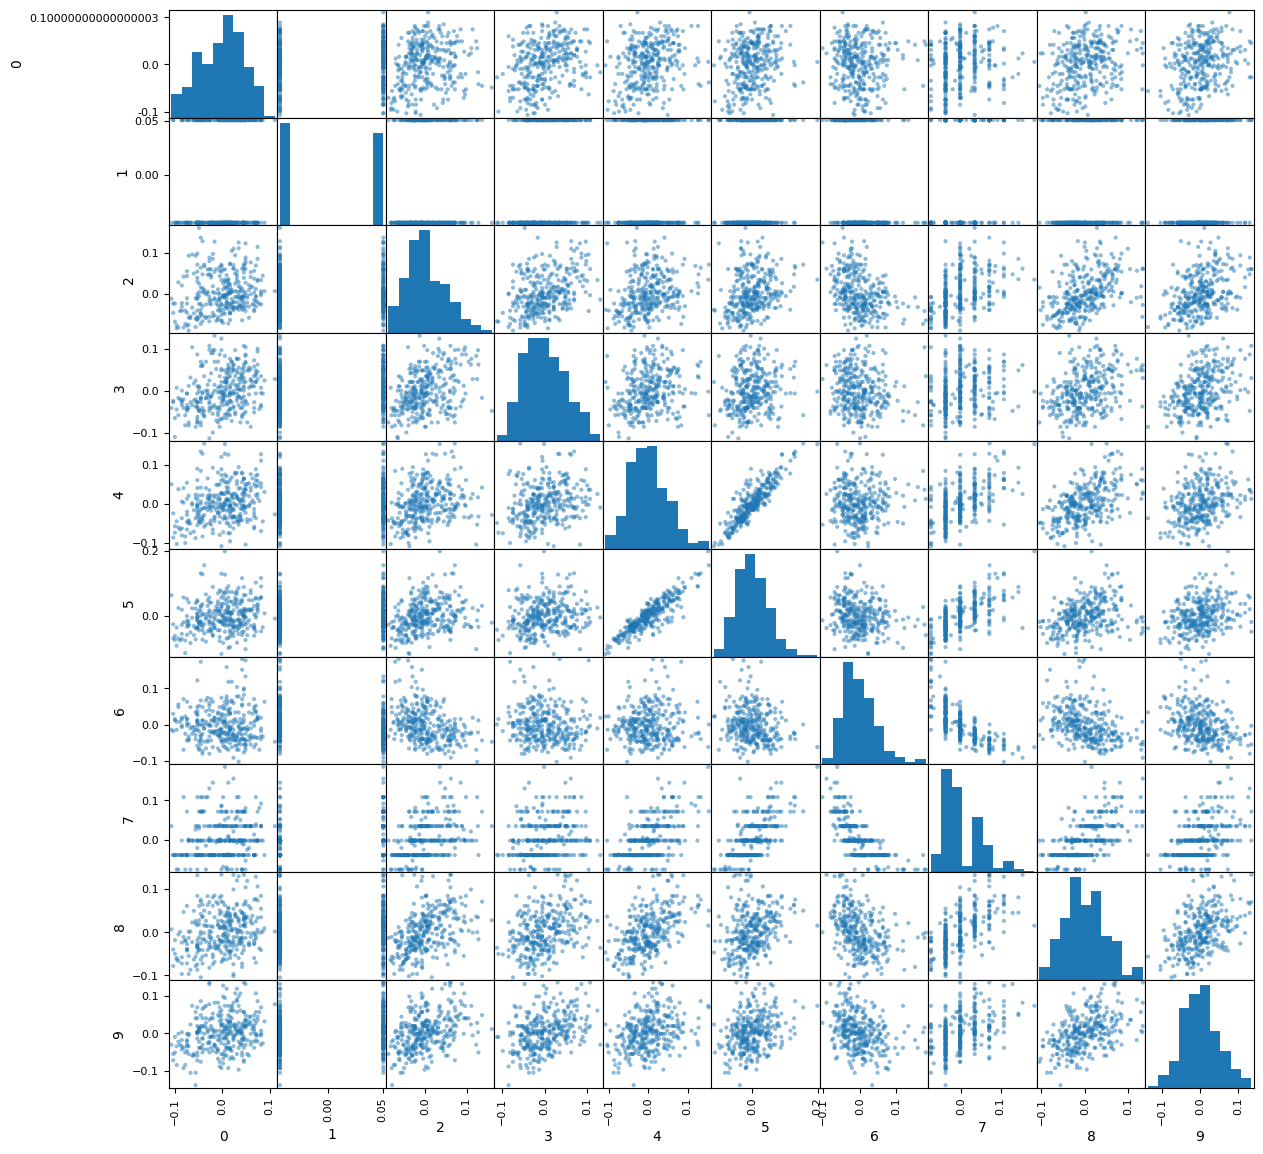

In [33]:
scatter_matrix(pd.DataFrame(x_train), figsize=(14,14))

## Correlation Matrix

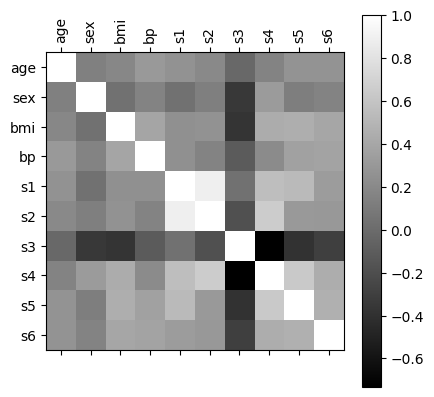

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,variable,VIF,Variance
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201,age,1.202558,0.002137
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936,sex,1.240147,0.002265
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699,bmi,1.554188,0.002302
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421,bp,1.414228,0.002297
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666,s1,53.872720,0.002300
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647,s2,34.744973,0.002291
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091,s3,13.794775,0.002244
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489,s4,9.267345,0.002350
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878,s5,10.118703,0.002294
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000,s6,1.493868,0.002298


In [34]:
names = data.feature_names
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="grey")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.show()


vif_var_score = corr_mtx
vif_var_score['variable'] = names
vif_var_score['VIF'] = [vif(df_features.values, i) for i in range(len(names))]
vif_var_score['Variance'] = [np.var(df_features[n]) for n in names]

vif_var_score

# Features Selection

## Metric Function


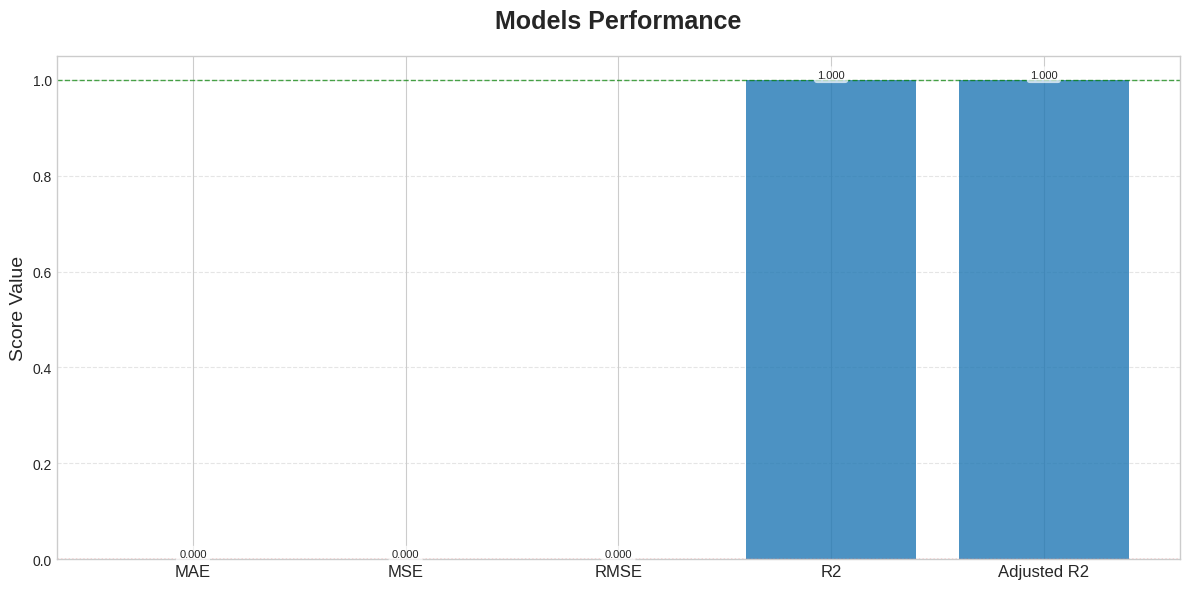

,Metric,Value
0,MAE,0.0
1,MSE,0.0
2,RMSE,0.0
3,R2,1.0
4,Adjusted R2,1.0


In [39]:
def feature_importance(model, n_features):
    # With permutation test
    pass



def metric(y_hat, y_true,features_shape):
    n,p = features_shape
    r2 = r2_score(y_true, y_hat)
    socres = {
        "MAE": mean_absolute_error(y_true, y_hat),
        "MSE": mean_squared_error(y_true, y_hat),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_hat)),
        "R2": r2,
        "Adjusted R2":  1 - (1 - r2) * (n - 1) / (n - p - 1)
    }

    df_score = pd.DataFrame(socres.items(), columns=["Metric","Value"])

    return df_score


dummy  = metric(y_test, y_test, x_train.shape)

def plot_meterics(df_dict):

    if isinstance(df_dict, pd.DataFrame):
        df_dict = {'Model': df_dict}

    # Define the order and subset of metrics to plot
    metrics_to_plot = ["MAE", "MSE", "RMSE", "R2", "Adjusted R2"]
    metrics_order = {m: i for i, m in enumerate(metrics_to_plot)}

    # Combine and filter dataframes
    all_data = []
    for model_name, df in df_dict.items():
        # Filter for the required metrics
        filtered_df = df[df['Metric'].isin(metrics_to_plot)].copy()
        filtered_df['Model'] = model_name
        all_data.append(filtered_df)

    if not all_data:
        print("Error: No data available to plot after filtering.")
        return

    combined_df = pd.concat(all_data, ignore_index=True)

    # Sort the dataframe according to the predefined metric order
    combined_df['Order'] = combined_df['Metric'].map(metrics_order)
    combined_df.sort_values(by=['Order', 'Model'], inplace=True)

    # --- Plotting ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 6))

    models = combined_df['Model'].unique()
    n_models = len(models)
    n_metrics = len(metrics_to_plot)
    bar_width = 0.8 / n_models

    x_base = np.arange(n_metrics)

    for i, model in enumerate(models):
        model_data = combined_df[combined_df['Model'] == model]
        values = model_data['Value'].values

        # Calculate position for this model's bars
        offset = (i - (n_models - 1) / 2) * bar_width
        bars = ax.bar(x_base + offset, values, bar_width, label=model, alpha=0.8)

        # Add value labels on top of the bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=8,
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


    # Customizing the plot
    ax.set_xticks(x_base)
    ax.set_xticklabels(metrics_to_plot, fontsize=12, fontweight='medium')
    ax.set_ylabel('Score Value', fontsize=14)
    ax.set_title("Models Performance", fontsize=18, fontweight='bold', pad=20)

    # Add legend if needed
    if n_models > 1 or models[0] != 'Model':
        ax.legend(title='Model', fontsize=10, title_fontsize=12, frameon=True, shadow=True)

    # Add horizontal lines for R2/Adj R2 targets for context
    ax.axhline(1.0, color='green', linestyle='--', linewidth=1.0, alpha=0.7, label='Perfect Fit (R2=1.0)')
    ax.axhline(0.0, color='red', linestyle=':', linewidth=1.0, alpha=0.7, label='Baseline Fit (R2=0.0)')

    ax.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


plot_meterics(dummy)
dummy

# Features Selection

In [69]:
def select_features(selector):
    global x_train, y_train

    selector.fit(x_train, y_train)
    mask = selector.get_support()

    new_x = selector.fit_transform(x_train, y_train)

    selected_names = df_features.columns[mask]

    df_selected = df_features[selected_names]

    return df_selected



## Variance Treshold

In [70]:
VT = SelectKBest(f_regression, k=5)
select_features(VT)

,bmi,bp,s3,s4,s5
0,0.032595,0.049415,-0.069172,0.034309,0.063015
1,0.085408,0.063187,0.015505,-0.002592,0.006207
2,-0.010517,0.025315,-0.039719,0.034309,0.020609
3,0.110198,0.063187,-0.024993,0.020655,0.099241
4,-0.006206,-0.019442,-0.039719,0.034309,0.014821
...,...,...,...,...,...
304,-0.076264,-0.043542,0.008142,-0.039493,-0.059471
305,0.030440,0.083844,0.015505,-0.039493,0.008641
306,-0.020218,-0.005670,0.078093,-0.039493,-0.010903
307,-0.023451,-0.040099,-0.017629,-0.002592,-0.038460


## Unvariate Selection

In [71]:
US = SelectKBest(mutual_info_regression, k=5)
select_features(US)

,bmi,s2,s4,s5,s6
0,0.032595,-0.043589,0.034309,0.063015,0.003064
1,0.085408,0.013091,-0.002592,0.006207,0.085907
2,-0.010517,0.040022,0.034309,0.020609,0.056912
3,0.110198,-0.032942,0.020655,0.099241,0.023775
4,-0.006206,0.004949,0.034309,0.014821,0.098333
...,...,...,...,...,...
304,-0.076264,-0.034821,-0.039493,-0.059471,-0.083920
305,0.030440,-0.047347,-0.039493,0.008641,0.015491
306,-0.020218,-0.029497,-0.039493,-0.010903,-0.001078
307,-0.023451,0.004636,-0.002592,-0.038460,-0.038357


## RFE

In [75]:
from sklearn.linear_model import LinearRegression

rfe_cv = RFECV(LinearRegression(), cv=5, scoring='neg_mean_squared_error')
select_features(rfe_cv)

,sex,bmi,bp,s1,s2,s3,s4,s5
0,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015
1,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207
2,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609
3,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241
4,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821
...,...,...,...,...,...,...,...,...
304,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471
305,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641
306,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903
307,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460


# Piplines

In [ ]:
def Select_feature(model, k=5, n_df_features=5):
    baseline = Pipeline([('regressor', model)])
    kbest = Pipeline([('feature_selection', ),('regressor', model)])
